# ==================================
#        Breast Cancer Detection    
# ==================================


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [43]:
dataset=pd.read_csv("Breast_cancer_dataset.csv")
#dataset2=pd.read_csv("Breastcancer detection.zip")
print(dataset)
#print(dataset2)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# Dataset Information

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dataset.shape

(569, 33)

In [7]:
dataset.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


##  Full Dataset Preview

In [9]:
print(dataset.to_string()) 

            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0       842302         M       17.990         10.38          122.80     1001.0          0.11840           0.27760        0.300100             0.147100         0.2419                 0.07871     1.0950      0.9053        8.5890  153.400       0.006399        0.049040      0.053730           0.015870     0.030030              0.006193        25.380          17.33           184.60      2019.0           0.16220            0.66560         0.711900              0.265400         

# Benign vs Maligant

In [10]:
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
dataset.groupby('diagnosis')["radius_mean"].mean()

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

# Multiple aggregations

In [ ]:
dataset.groupby('diagnosis').agg({
    "radius_mean": ["mean", "max" , "min"],
    "area_mean": ["mean", "max"   ,   "min"]
})

radius_mean                  area_mean               
                 mean    max     min        mean     max    min
diagnosis                                                      
B           12.146524  17.85   6.981  462.790196   992.1  143.5
M           17.462830  28.11  10.950  978.376415  2501.0  361.6

In [9]:
dataset['fractal_dimension_worst'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: fractal_dimension_worst
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


# Unique and non Unique Values

In [7]:
dataset['fractal_dimension_worst'].unique()

array([0.1189 , 0.08902, 0.08758, 0.173  , 0.07678, 0.1244 , 0.08368,
       0.1151 , 0.1072 , 0.2075 , 0.08452, 0.1048 , 0.1023 , 0.06287,
       0.1431 , 0.1341 , 0.08216, 0.1142 , 0.07615, 0.07259, 0.08183,
       0.07773, 0.09946, 0.07526, 0.09564, 0.1059 , 0.1275 , 0.07421,
       0.09876, 0.07919, 0.09782, 0.1402 , 0.08482, 0.1123 , 0.1233 ,
       0.08633, 0.1014 , 0.06169, 0.05504, 0.1071 , 0.07146, 0.09606,
       0.1038 , 0.1027 , 0.09618, 0.09185, 0.07409, 0.1179 , 0.08301,
       0.06917, 0.06563, 0.08025, 0.07408, 0.07987, 0.07873, 0.07036,
       0.08294, 0.1094 , 0.06289, 0.09026, 0.0802 , 0.07712, 0.1132 ,
       0.0849 , 0.1031 , 0.08911, 0.09211, 0.06641, 0.1175 , 0.0641 ,
       0.06589, 0.1084 , 0.1339 , 0.103  , 0.07609, 0.06387, 0.07191,
       0.1108 , 0.09964, 0.07918, 0.08851, 0.1016 , 0.1051 , 0.09203,
       0.07924, 0.08579, 0.06846, 0.09288, 0.09261, 0.08473, 0.07246,
       0.06828, 0.06206, 0.06603, 0.08234, 0.07376, 0.08988, 0.08756,
       0.09353, 0.07

In [10]:
dataset['fractal_dimension_worst'].nunique()

535

# Detect Missing value

In [16]:
missing_value=dataset.isnull().sum()
print(missing_value)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
sort_values=dataset.sort_values(['perimeter_mean','area_mean'])
print(sort_values)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
101     862722         B        6.981         13.43           43.79   
568      92751         B        7.760         24.54           47.92   
538     921092         B        7.729         25.49           47.98   
539     921362         B        7.691         25.44           48.34   
46    85713702         B        8.196         16.84           51.71   
..         ...       ...          ...           ...             ...   
82     8611555         M       25.220         24.91          171.50   
352     899987         M       25.730         17.46          174.20   
180     873592         M       27.220         21.87          182.10   
461  911296202         M       27.420         26.27          186.90   
212    8810703         M       28.110         18.47          188.50   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
101      143.5          0.11700           0.07568         0.00000   
568      

# Distribution of Benign and Malignant Tumors

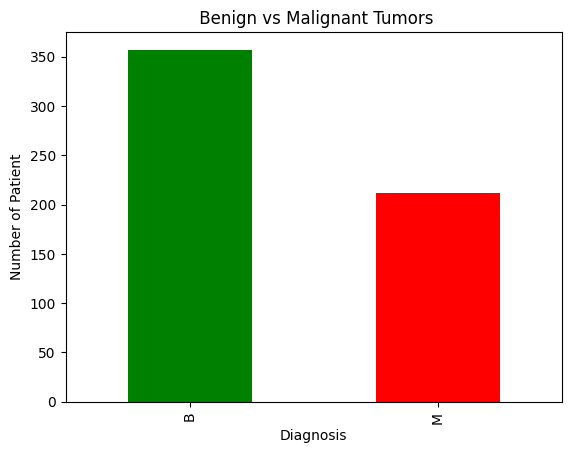

In [28]:
dataset['diagnosis'].value_counts().plot(kind='bar',color=['green','red'])
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patient')
plt.title(" Benign vs Malignant Tumors")
plt.show()

# Relationship Between Tumor Radius and Area

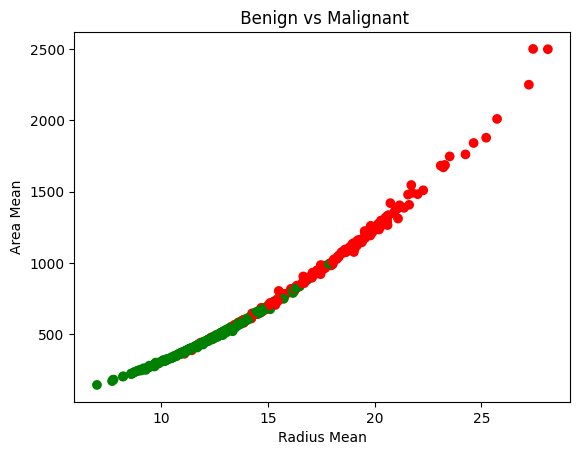

In [26]:
colors=dataset['diagnosis'].map({'M':'Red','B':'Green'})
plt.scatter(dataset['radius_mean'],dataset['area_mean'],c=colors)
plt.xlabel("Radius Mean")
plt.ylabel("Area Mean")
plt.title(" Benign vs Malignant")
plt.show()

# Distribution of Tumor Radius for Benign and Malignant Cases

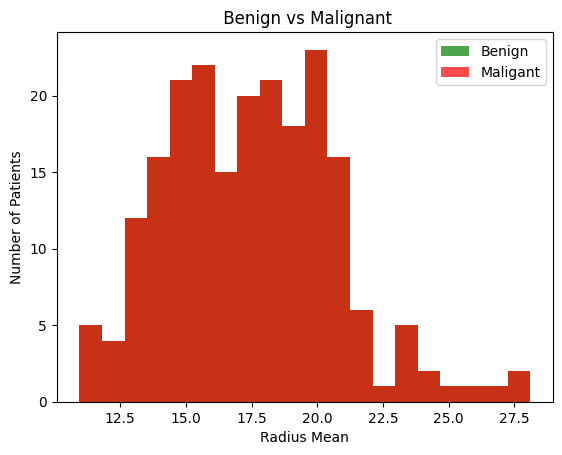

In [27]:
benign = dataset[dataset['diagnosis'] == 'B']['radius_mean']
benign = dataset[dataset['diagnosis'] == 'M']['radius_mean']
plt.hist(benign, bins=20, alpha=0.7, label='Benign', color='green')
plt.hist(benign, bins=20, alpha=0.7, label='Maligant', color='red')
plt.xlabel('Radius Mean')
plt.ylabel('Number of Patients')
plt.title(' Benign vs Malignant')
plt.legend()
plt.show()


# "Distribution of Large Benign Tumors "

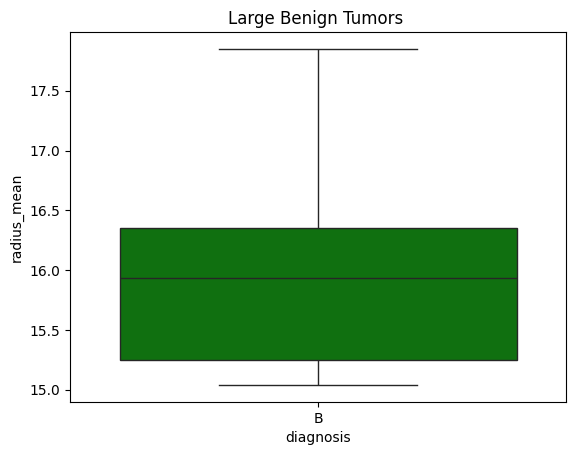

In [32]:
benign_large = dataset[(dataset['diagnosis'] == 'B') & (dataset['radius_mean'] > 15)]

sns.boxplot(data=benign_large, x='diagnosis', y='radius_mean', color='green')
plt.title("Large Benign Tumors ")
plt.show()

# Largest Malignant Tumors by Mean Radius (Top 10)

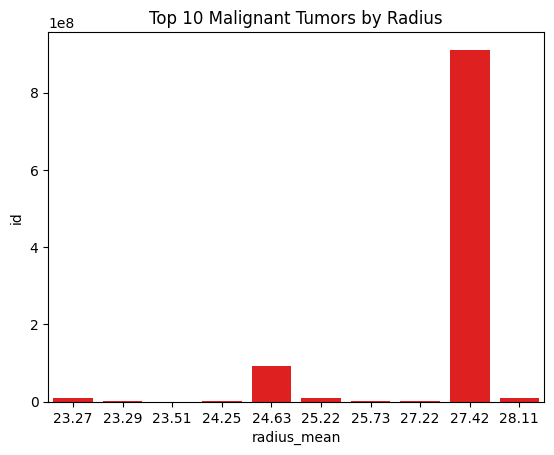

In [41]:
top_malignant = dataset[dataset['diagnosis'] == 'M'].nlargest(10, 'radius_mean')

sns.barplot(data=top_malignant, x='radius_mean', y='id', color='Red' )
plt.title("Top 10 Malignant Tumors by Radius")
plt.show()


# Relationship Between Tumor Radius and Area by Diagnosis

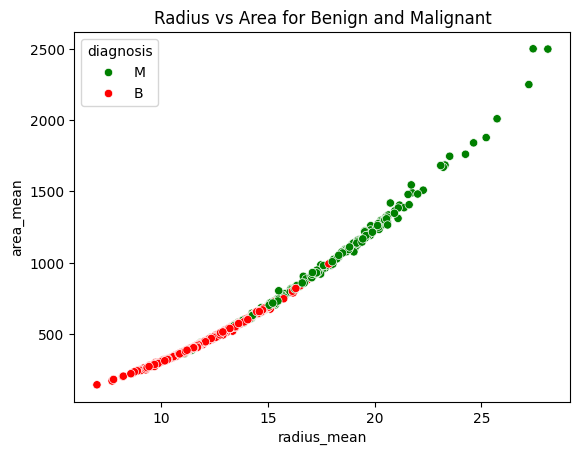

In [37]:
sns.scatterplot(data=dataset, x='radius_mean', y='area_mean', hue='diagnosis', palette=['green', 'red'])
plt.title("Radius vs Area for Benign and Malignant")
plt.show()


# Tumor Radius vs Area with Diagnosis-Based Clustering

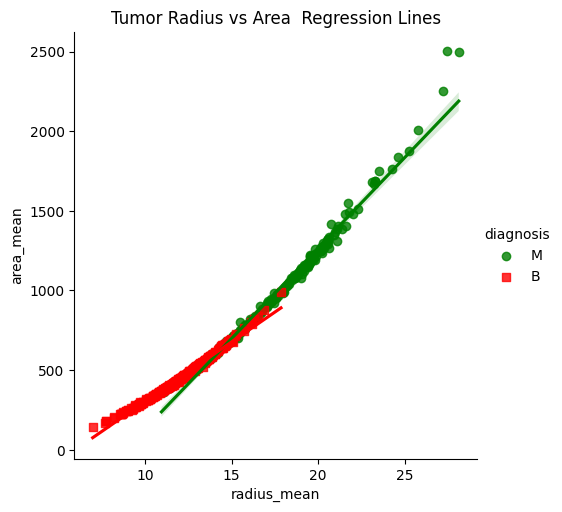

In [44]:


sns.lmplot(data=dataset, x='radius_mean', y='area_mean', hue='diagnosis', 
           palette=['green', 'red'], fit_reg=True, markers=['o', 's'])
plt.title("Tumor Radius vs Area  Regression Lines")
plt.show()
